In [1]:
from cosmoLCDM import cosmoLCDM
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# set up cosmology
cosmo = cosmoLCDM(67.6, 0.31, 0.048, 2.7255, 2e-9, 0.9655)

### comoving distance and redshift

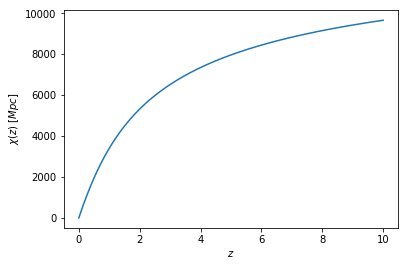

In [40]:
# redshift to comoving distance
zs = np.arange(0, 10, 0.0003)
chis = cosmo.z2chi(zs)
plt.plot(zs, chis); plt.xlabel(r'$z$'); plt.ylabel(r'$\chi(z)\ [Mpc]$'); plt.show()

In [41]:
# generate redshift <-> comoving distance interpolator
cosmo.gen_interp_chiz(zmin=0, zmax=10, dz=0.001, kind='cubic')

>> self.interp_chi2z(chi) and self.interp_z2chi(z) generated for z in [0, 10]                with dz=0.001 interpolated with cubic


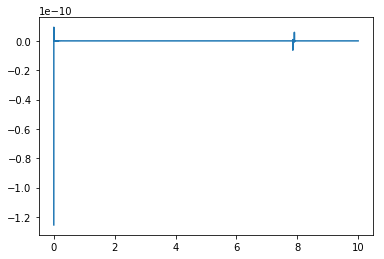

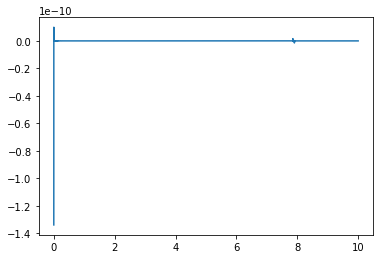

In [43]:
# check chi to z interpolator
zs_ = cosmo.interp_chi2z(chis)
plt.plot(zs[1:], (zs[1:]-zs_[1:]) / zs[1:]); plt.show()
# check z to chi interpolator
chis_ = cosmo.interp_z2chi(zs)
plt.plot(zs[1:], (chis[1:]-chis_[1:]) / chis[1:]); plt.show()

In [29]:
# speed test: computing chi directly vs interpolation
t_zs = np.arange(0, 10, 0.00001)
t1 = time.time()
t_chis = cosmo.z2chi(t_zs)
t2 = time.time()
t_chis_ = cosmo.interp_z2chi(t_zs)
t3 = time.time()
print('computing: {0:f} s, interpolation: {1:f} s'.format(t2-t1, t3-t2))
del t_zs, t_chis, t_chis_

computing: 14.113363 s, interpolation: 0.049783 s


### growth factor

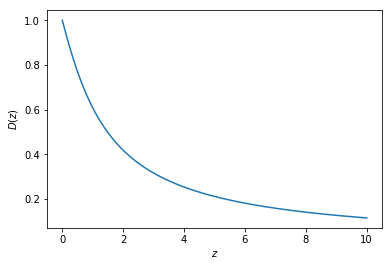

In [45]:
zs = np.arange(0, 10, 0.001)
Dzs = np.array([cosmo.D_z(zs_) for zs_ in zs])
plt.plot(zs, Dzs); plt.xlabel(r'$z$'); plt.ylabel(r'$D(z)$'); plt.show()

>> self.interp_D_z(z) generated for z in [0, 10] with dz=0.01 interpolated with cubic


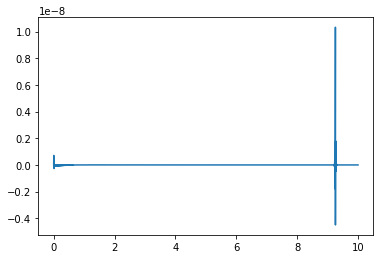

In [46]:
# check the interpolator
cosmo.gen_interp_D_z(zmin=0, zmax=10, dz=0.01, kind='cubic')
Dzs_ = cosmo.interp_D_z(zs)
plt.plot(zs, (Dzs-Dzs_)/Dzs); plt.show()

### Hubble parameter

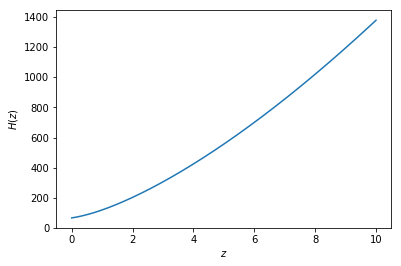

In [49]:
zs = np.arange(0, 10, 0.001)
Hzs = cosmo.H_z(zs)
plt.plot(zs, Hzs); plt.xlabel(r'$z$'); plt.ylabel(r'$H(z)$'); plt.show()

### CMB lensing kernel

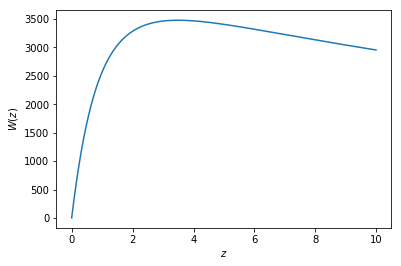

In [10]:
zs = np.arange(0, 10, 0.01)
Wzs = cosmo.w_z(zs)
plt.plot(zs, Wzs); plt.xlabel(r'$z$'); plt.ylabel(r'$W(z)$'); plt.show()

direct computation: 15.255070 s
>> self.interp_chi2z(chi) and self.interp_z2chi(z) generated for z in [0, 10]                with dz=0.001 interpolated with cubic
with interpolated z2chi: 0.056020 s


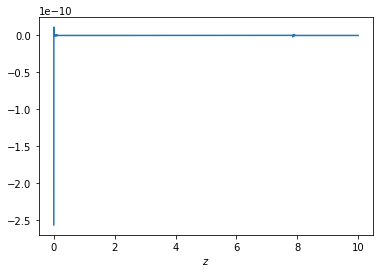

In [8]:
# speed test w/ interpolated version
zs = np.arange(0, 10, 0.00001)

t1 = time.time()
Wzs = cosmo.w_z(zs)
print('direct computation: {0:f} s'.format(time.time()-t1))

cosmo.gen_interp_chiz(zmin=0, zmax=10, dz=0.001, kind='cubic')
t1 = time.time()
Wzs_ = cosmo.interp_w_z(zs)
print('with interpolated z2chi: {0:f} s'.format(time.time()-t1))

plt.plot(zs[1:], (Wzs[1:]-Wzs_[1:])/Wzs[1:]); plt.xlabel(r'$z$'); plt.show()

### matter transfer function

In [3]:
# generate the interpolator
cosmo.gen_interp_Tk(kmax=10)

>> Matter transfer function self.interp_Tk(k) generated with CAMB.


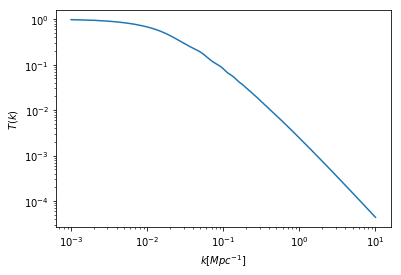

In [6]:
ks = np.arange(0.001, 10, 0.001)
Tks = cosmo.interp_Tk(ks)
plt.loglog(ks, Tks); plt.xlabel(r'$k [Mpc^{-1}]$'); plt.ylabel(r'$T(k)$'); plt.show()

### matter power spectrum